##Importing Libraries

In [1]:
import numpy as np # imports numpy the python numbers library. abbreviates it to np
import matplotlib.pyplot as plt # imports matplotlib.pyplot which allows us to visualize our data easier and make direct edits to the visualization of it. abbreviates it to plt.
from pylab import * # imports pylab which is a procedural module built into matplotlib.pyplot; it's used for object orienting.

## Introduces variables, randomly generated arrays, and the function "plt.imshow"

In [17]:
L = 5 # defines the variable "L" as 5
p = 0.5 # defines the variable "p" as 0.5

In [18]:
z = np.random.random((L,L)) # creates a variable "z" and identifies it as a random number array of LxL (5X5)

In [19]:
z # returns the randomly generated array "z"

array([[0.06667338, 0.18825297, 0.95812055, 0.06618261, 0.37284705],
       [0.76950363, 0.06148815, 0.5817308 , 0.06106431, 0.42307454],
       [0.62704687, 0.82317144, 0.25897845, 0.51443059, 0.88162002],
       [0.29354008, 0.01024992, 0.41338735, 0.25040598, 0.83047263],
       [0.61915869, 0.89390709, 0.38012081, 0.37798835, 0.38202733]])

In [20]:
p # returns "p"

0.5

In [21]:
z < p # asks the program to return whenever the array "z" is less than p (0.5)

array([[ True,  True, False,  True,  True],
       [False,  True, False,  True,  True],
       [False, False,  True, False, False],
       [ True,  True,  True,  True, False],
       [False, False,  True,  True,  True]])

In [22]:
m = z < p # creates the variable m which is an array of true and false that says where z is less than p

In [23]:
m #returns the array m

array([[ True,  True, False,  True,  True],
       [False,  True, False,  True,  True],
       [False, False,  True, False, False],
       [ True,  True,  True,  True, False],
       [False, False,  True,  True,  True]])

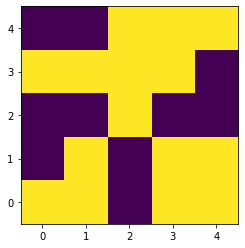

In [24]:
plt.imshow(m, origin='lower') #the function plt.imshow creates an image from a 2D numpy array
                              #the yellow squares are true and the purple are false

In [25]:
2**(L**2) #this function raies 2^L^2. 

33554432

In [26]:
from scipy.ndimage import measurements #imports the measurements package from the scipyndimage package which is a package that contains functions for multidimensional image processing.

In [27]:
lw,num = measurements.label(m) #the function lw,num=measurements.label() labels the points of the array that are neighbors (and true) with the same color. 

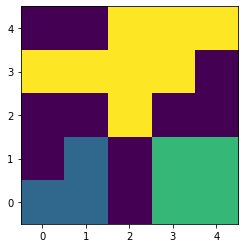

In [28]:
plt.imshow(lw, origin='lower') #plt.imshow plots the image with the new convolution. 

In [29]:
b = arange(lw.max() + 1) #

In [30]:
shuffle(b)

In [31]:
shuffledLw = b[lw]

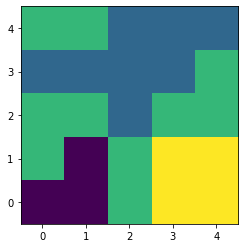

In [32]:
plt.imshow(shuffledLw, origin='lower')

In [ ]:
area = measurements.sum(m,lw, index=arange(lw.max() +1 ))

In [ ]:
areaImg = area[lw]

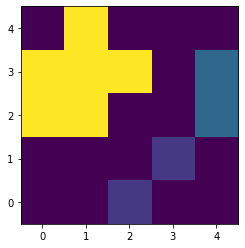

In [ ]:
plt.imshow(areaImg, origin='lower')

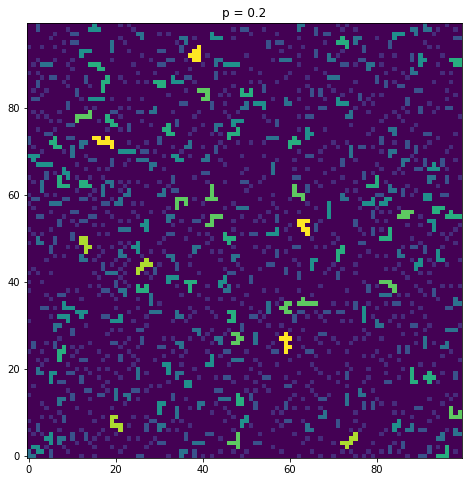

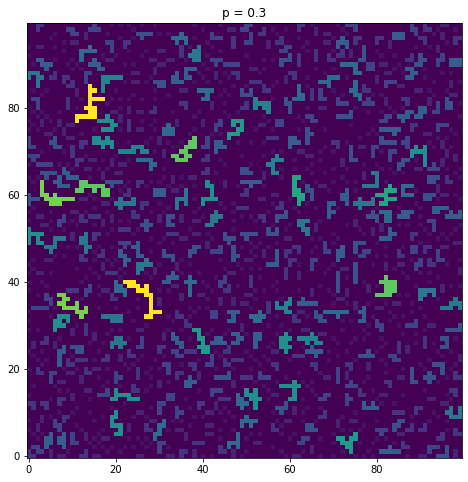

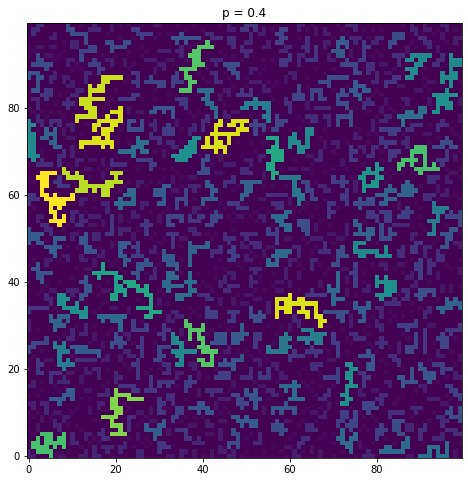

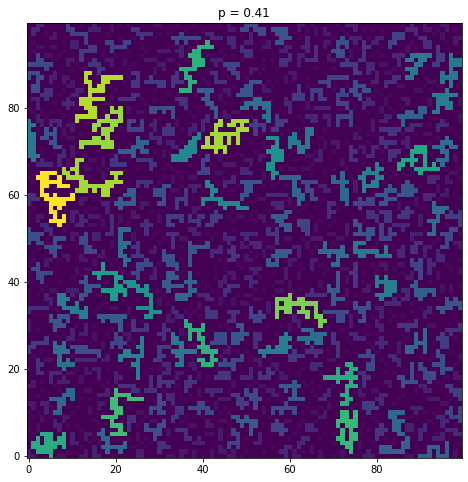

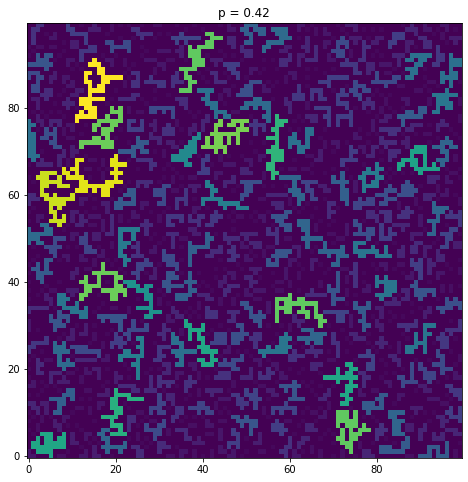

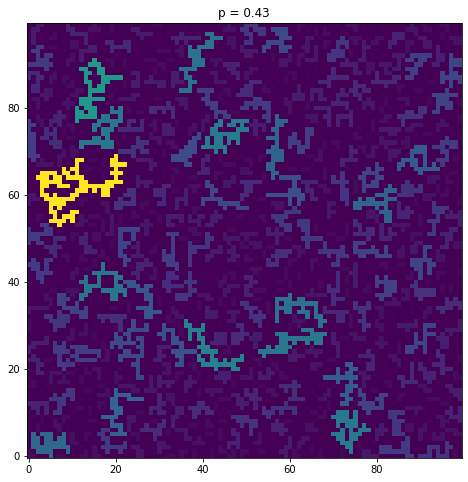

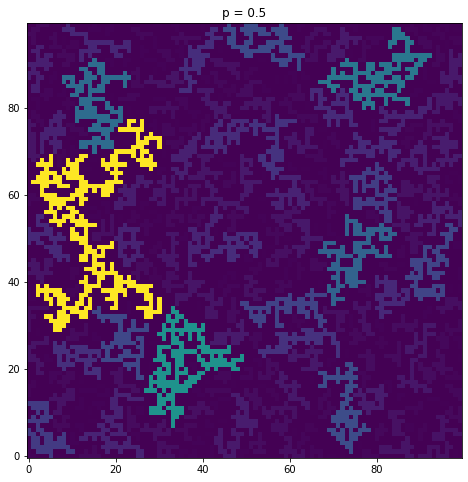

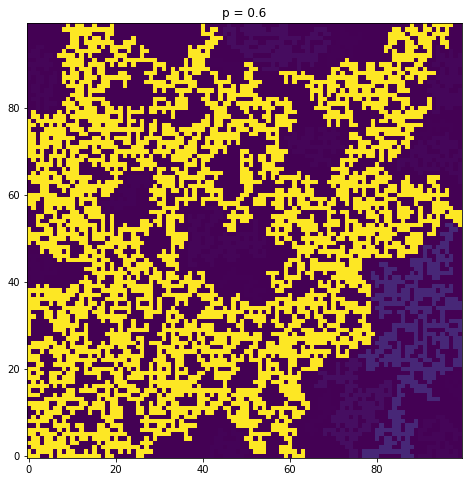

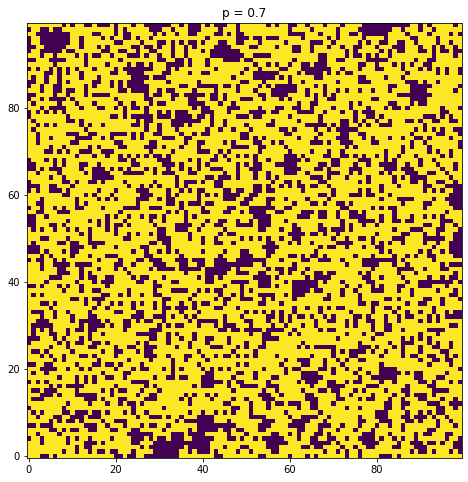

In [ ]:
L = 100
pv = [0.2,0.3,0.4,0.41,0.42,0.43,0.5,0.6,0.7]
z = np.random.random((L,L)) 
for i in range(len(pv)):
    p = pv[i]
    m = z < p
    lw,num = measurements.label(m)
    area = measurements.sum(m,lw, index=arange(lw.max() +1 ))
    areaImg = area[lw]
    plt.figure(figsize=(8, 8))
    plt.imshow(areaImg, origin='lower')
    title('p = ' + str(p))

In [ ]:
import numpy as np
from skimage import io as io
import matplotlib.pyplot as plt
from scipy import signal
import torch.nn.functional as F
from torch.nn.functional import *
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import time
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

In [ ]:
def make_ani(A, colormap='gray'):

    fig, ax = plt.subplots()
    im = ax.imshow(A[0,:,:], cmap = colormap);
    ax.axis('off')
    fig.set_size_inches(12, 12)

    def animate(data, im):
        im.set_data(data)

    def step():
        for i in range(A.shape[0]):
            data = A[i,:,:]
            yield data

    return animation.FuncAnimation(fig, animate, step, interval=100, repeat=True, fargs=(im,))

In [ ]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(8, 8)
    plt.show()

In [ ]:
def conv2(w,f): #GPU conv with padding

    n = conv2d(w.type(torch.int),f.type(torch.int))
    n = pad(n, (1, 1, 1, 1)) #add ones to the sides of the matrix

    return n

In [ ]:
#Forest Fire Model

In [ ]:
# veg = {empty = 0, burning = 1, green = 2}

In [ ]:
Plightning = 0.00005
Pgrowth = 0.01

w = (np.random.random((100,100)) > 0.5).astype(int)

f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

steps = 1000
A = torch.zeros((steps,100,100)) # storage for frames for animation
w = torch.tensor(w)[None,None,:,:]
f = torch.tensor(f)[None,None,:,:]

In [ ]:
for i in range(steps):
    
    n = w == 1
    
    n = conv2(n,f) #Count Neighbors (n is how many are on)
    
    w =  2*((w == 2)).type(torch.int)                                                \
    -      ((w == 2) * ( n > 0 ) ).type(torch.int)                                   \
    -      ((w == 2) * ( np.random.random((100,100)) < Plightning)).type(torch.int)  \
    +    2*((w == 0) * ( np.random.random((100,100)) < Pgrowth)).type(torch.int)
    
    A[i] = w

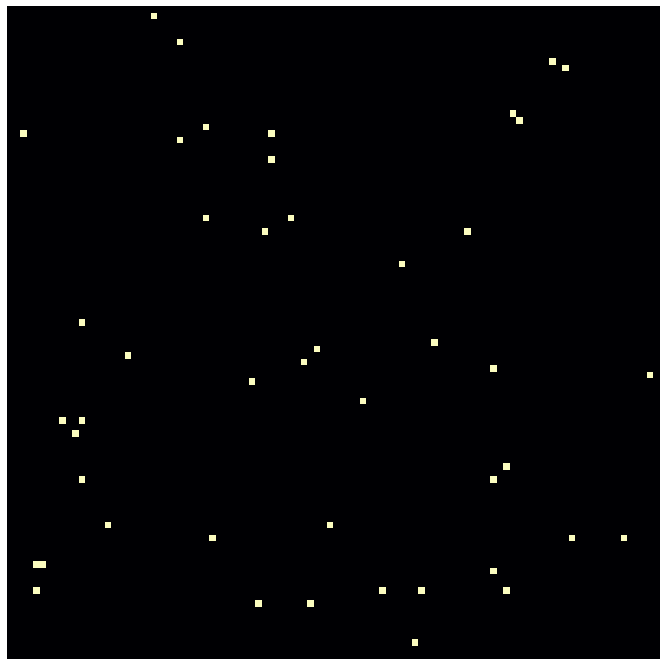

In [ ]:
make_ani(A, colormap='magma')

In [ ]:
L = 50
p = 0.48
z = np.random.random((L,L))
m = (z < p).astype(int)

In [ ]:
m[L-1,:] = 2
m[:,L-1] = 2
m[0,:] = 2
m[:,0] = 2

In [ ]:
# veg = {empty=0 burning=1 green=2}

In [ ]:
w = (2*m).astype(int)

w[L//2,L//2] = 1 #set a middle square on fire

f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

steps = 50
A = torch.zeros((steps,L,L)) # storage for frames for animation
w = torch.tensor(w)[None,None,:,:]
f = torch.tensor(f)[None,None,:,:]

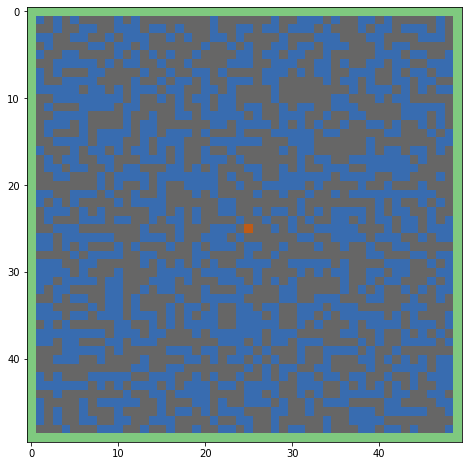

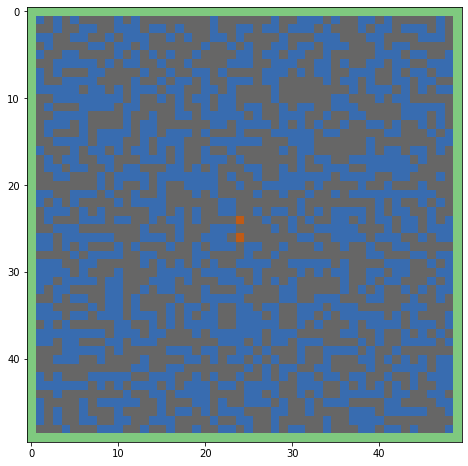

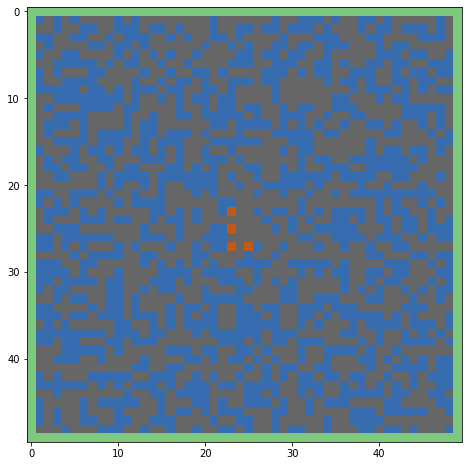

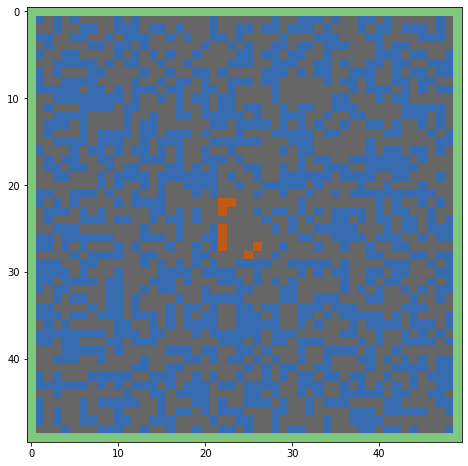

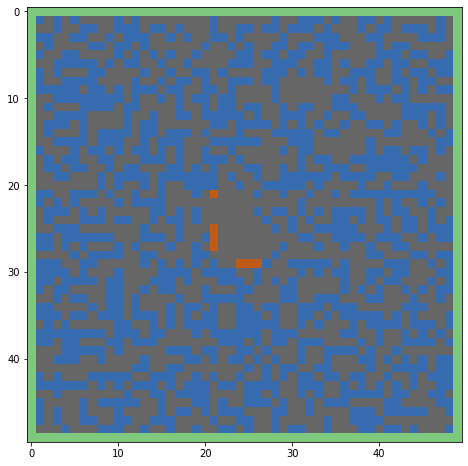

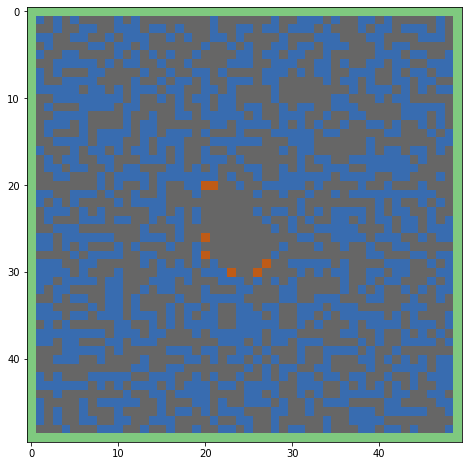

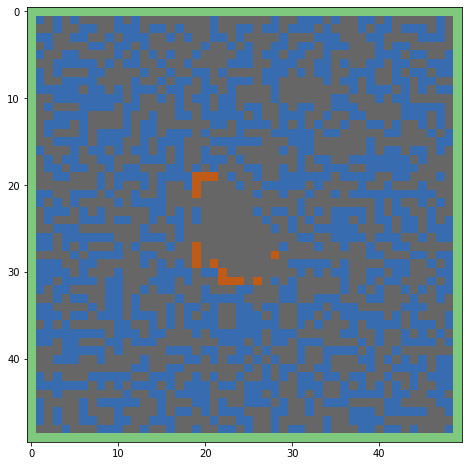

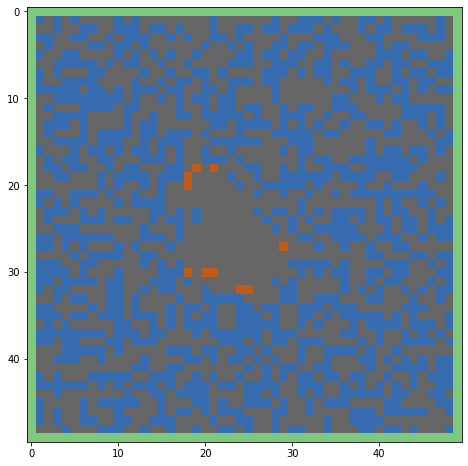

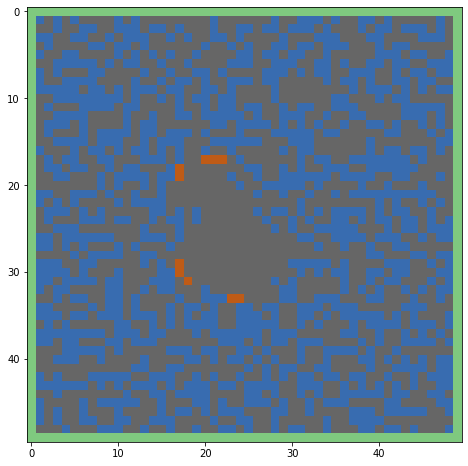

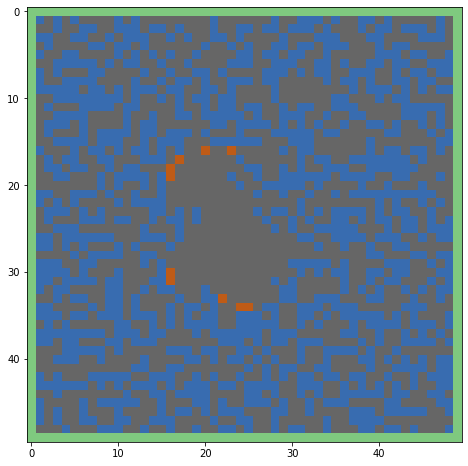

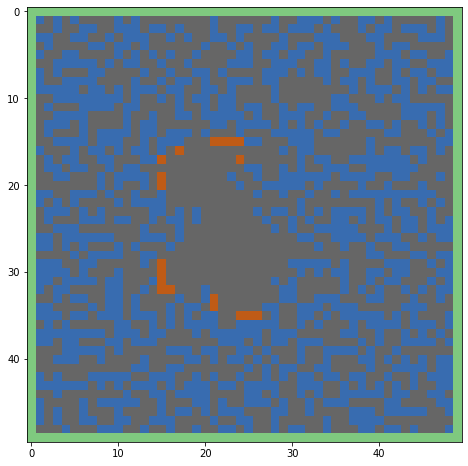

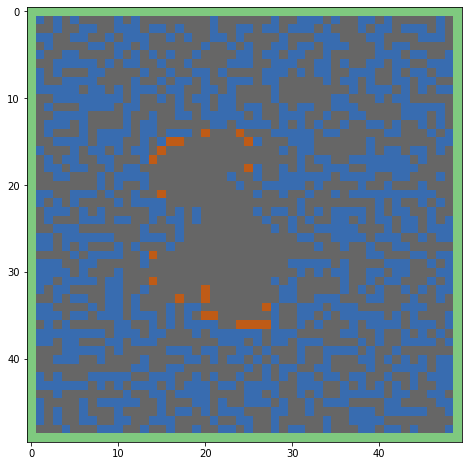

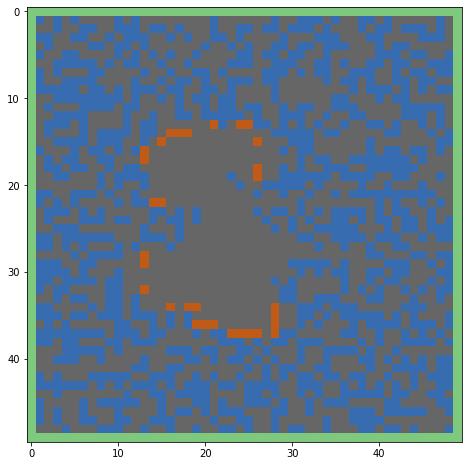

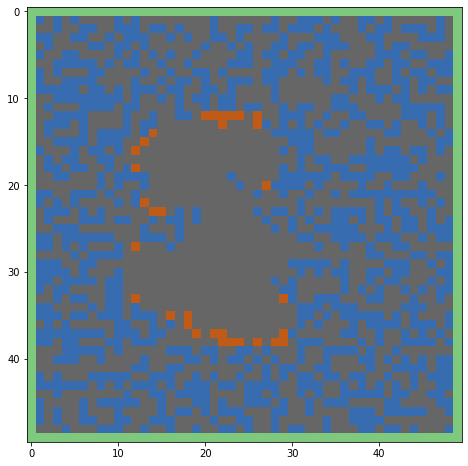

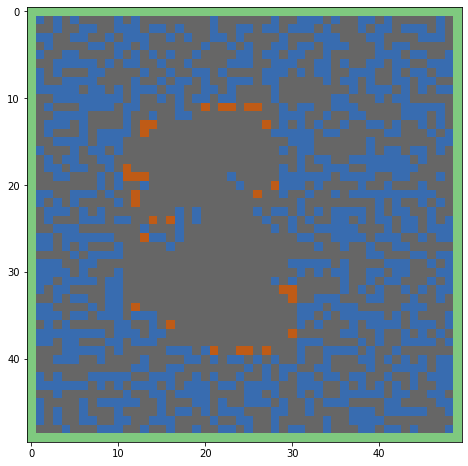

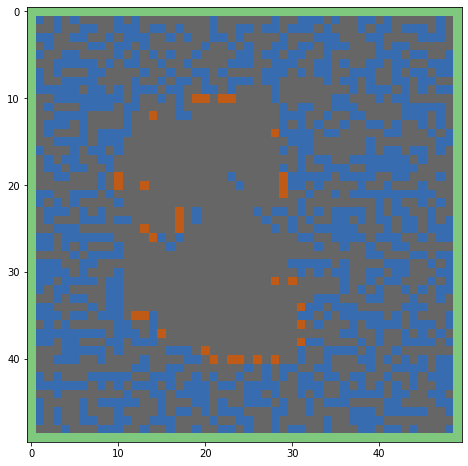

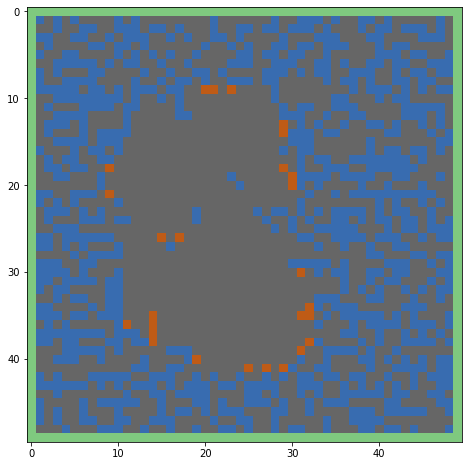

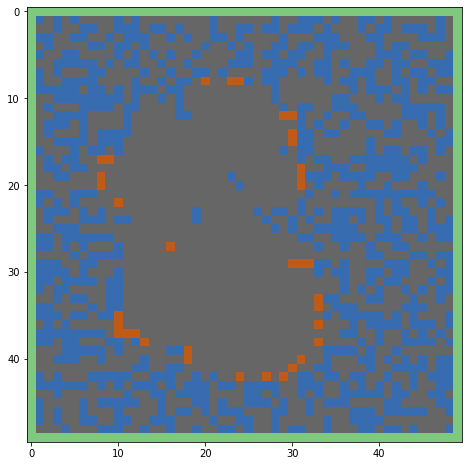

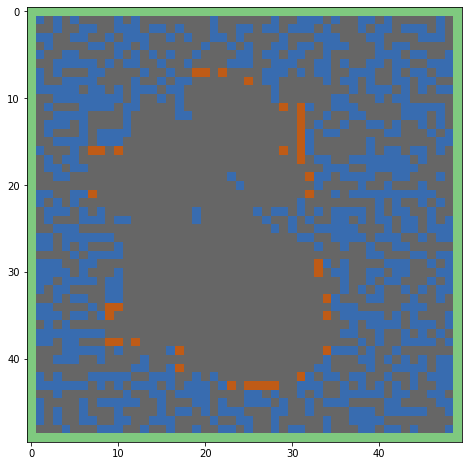

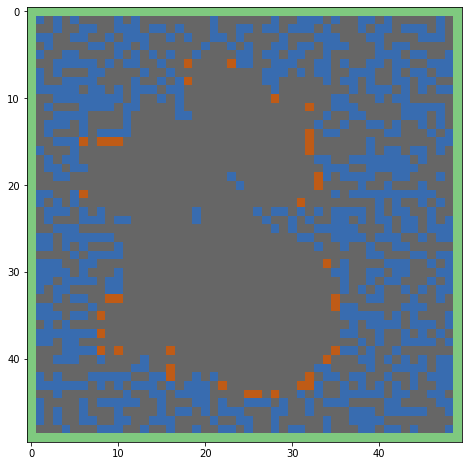

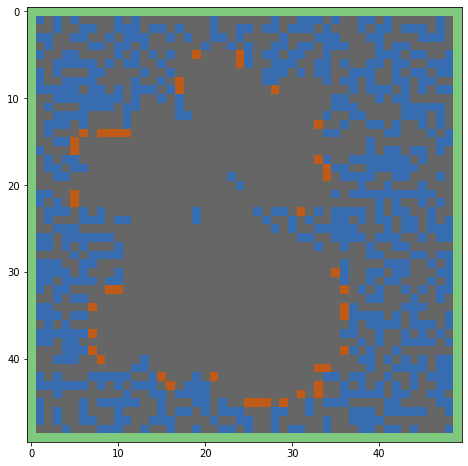

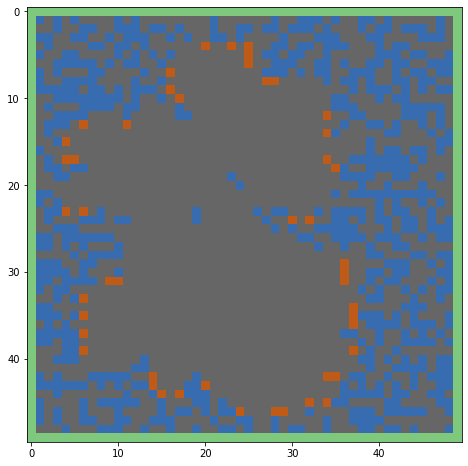

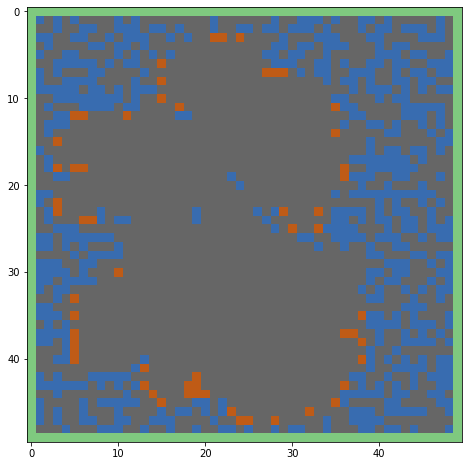

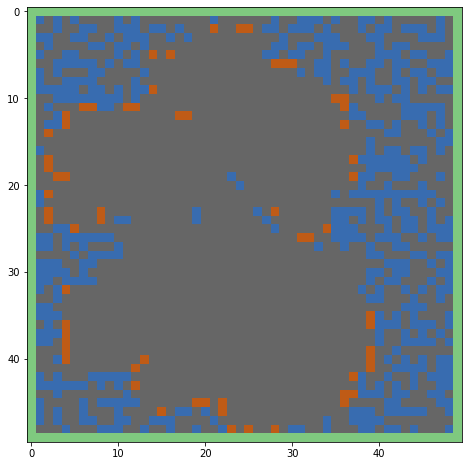

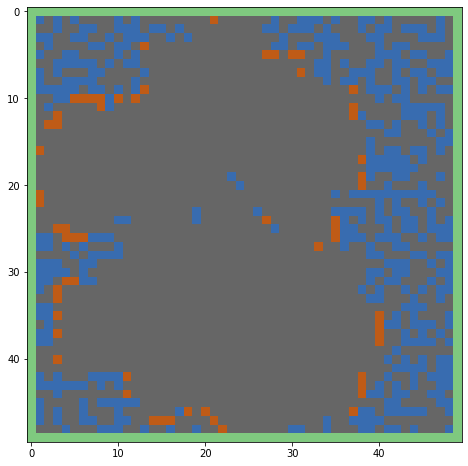

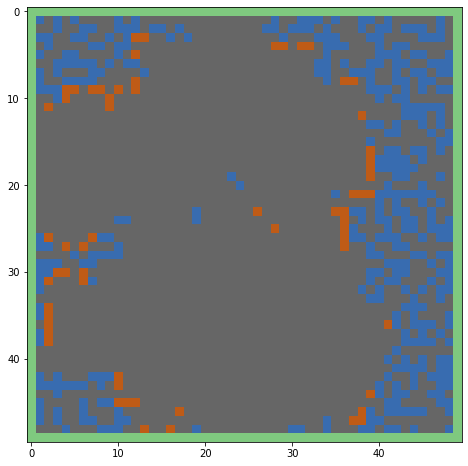

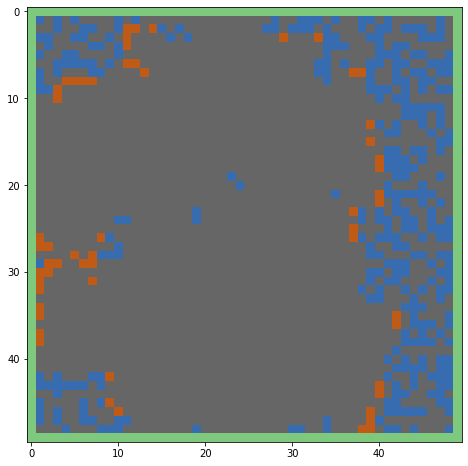

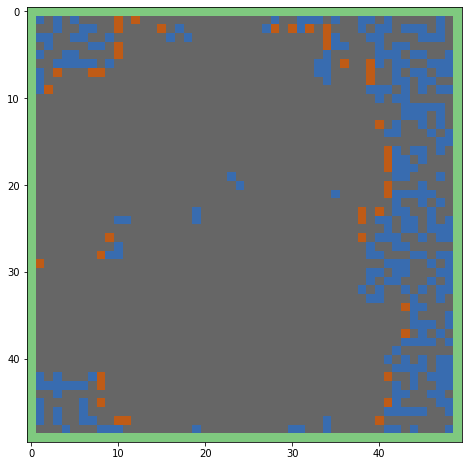

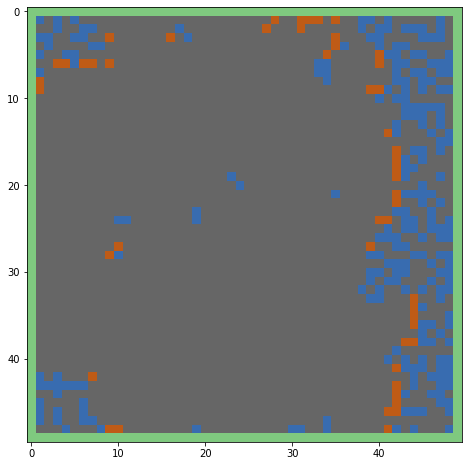

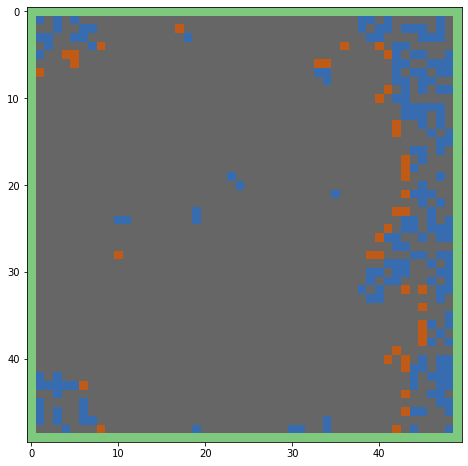

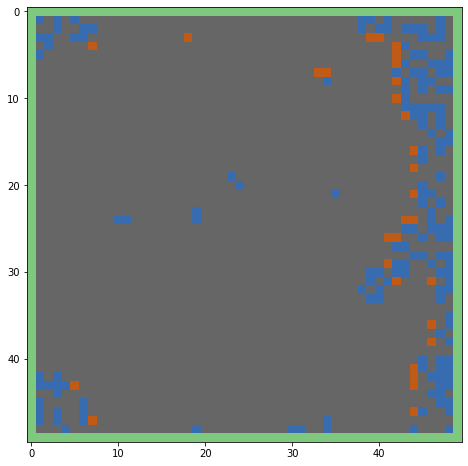

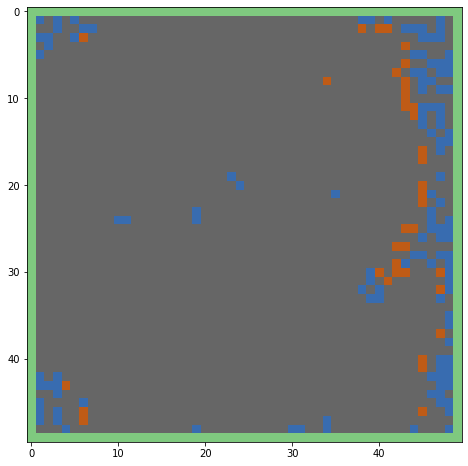

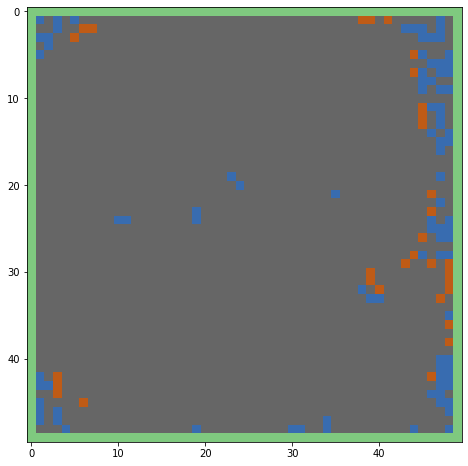

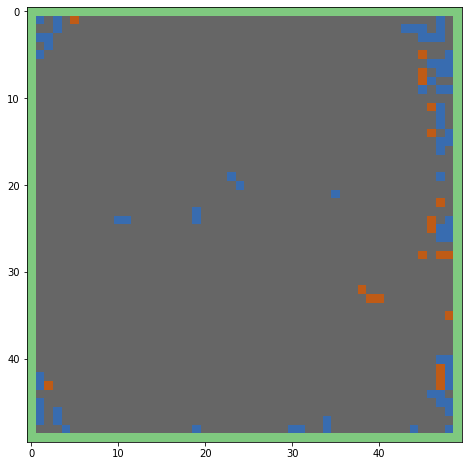

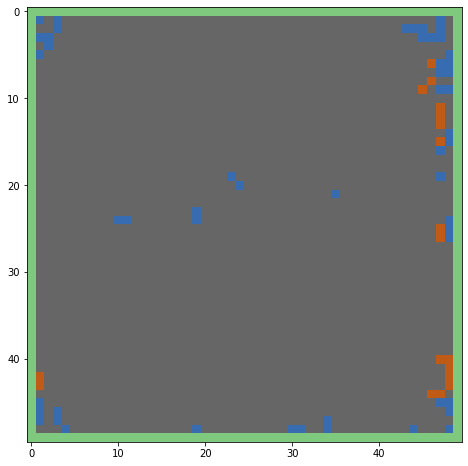

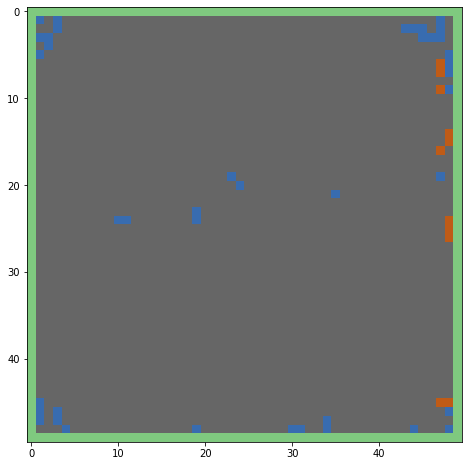

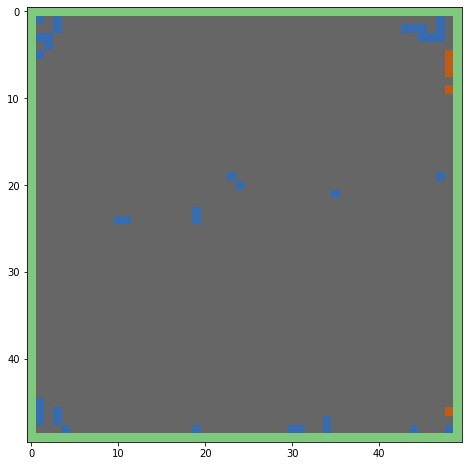

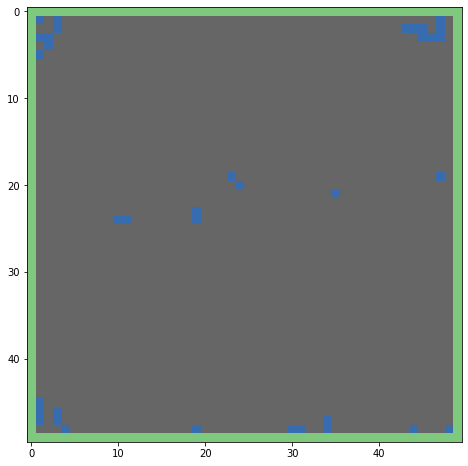

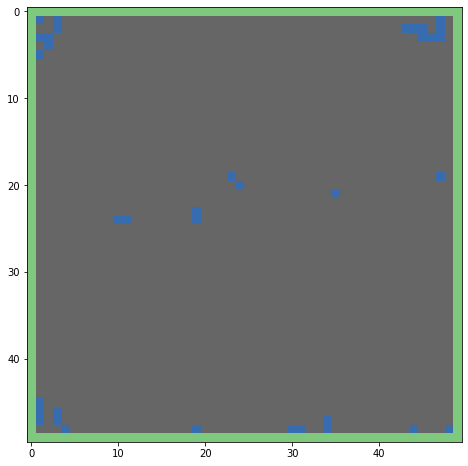

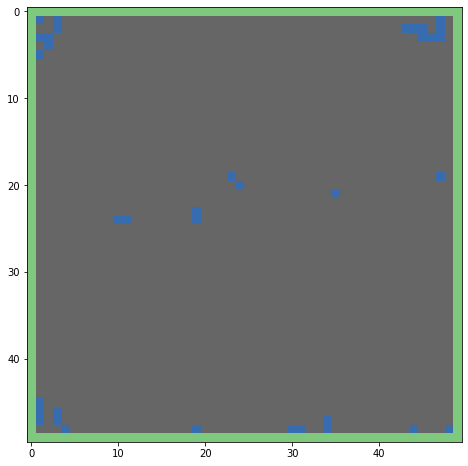

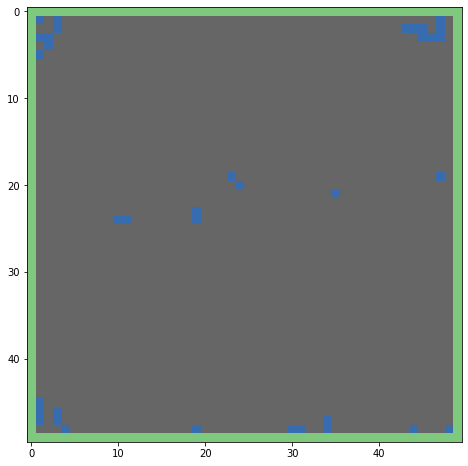

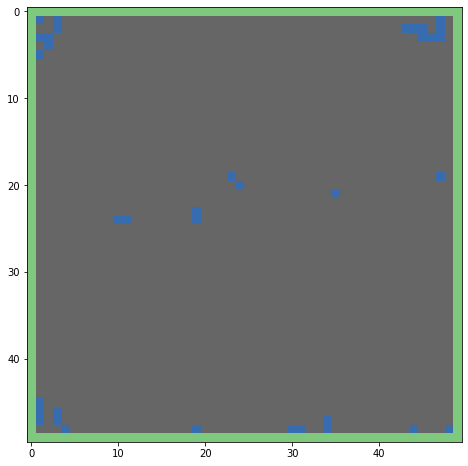

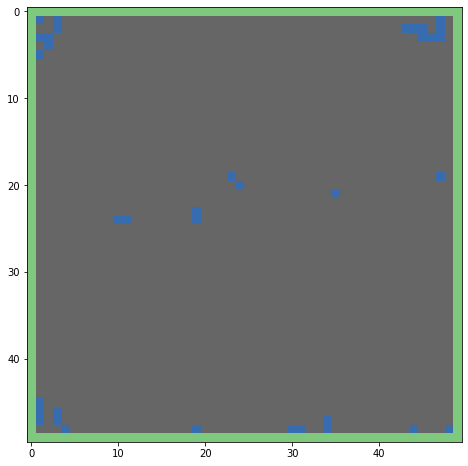

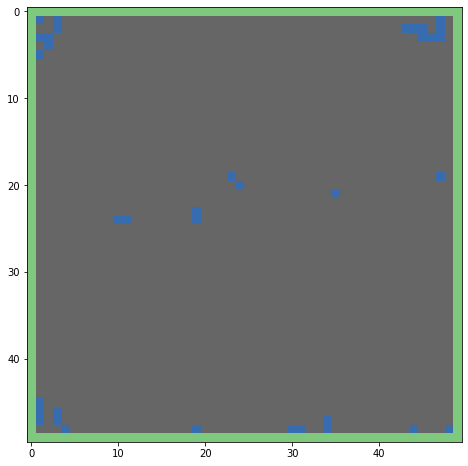

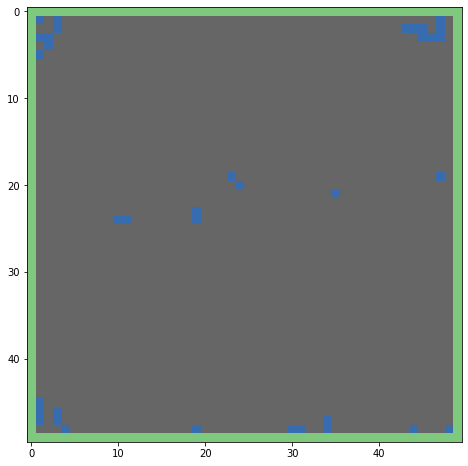

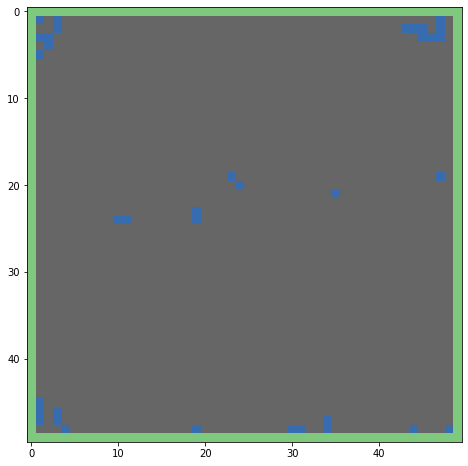

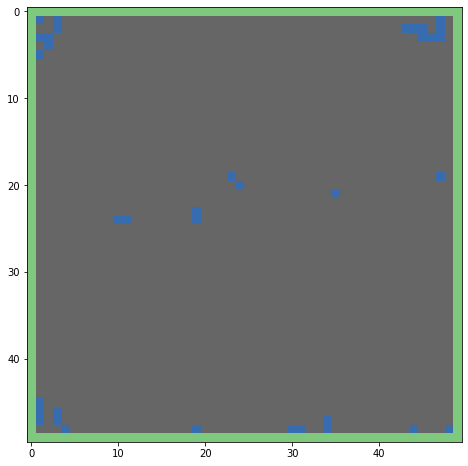

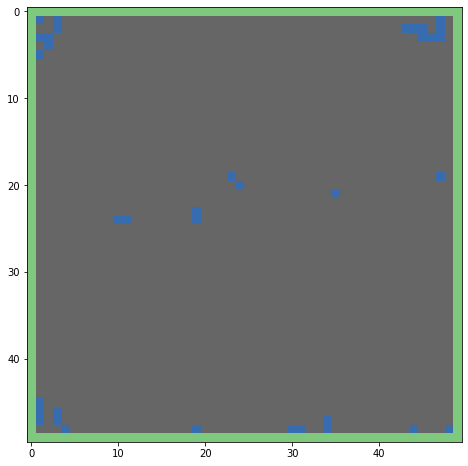

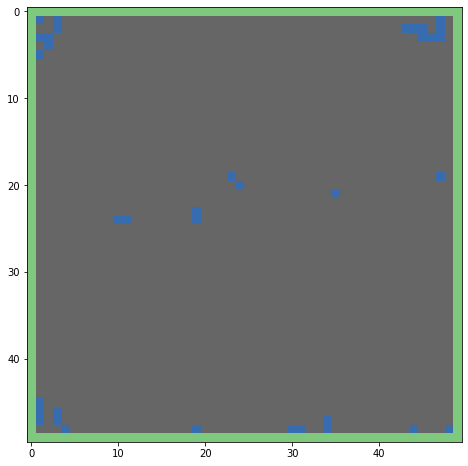

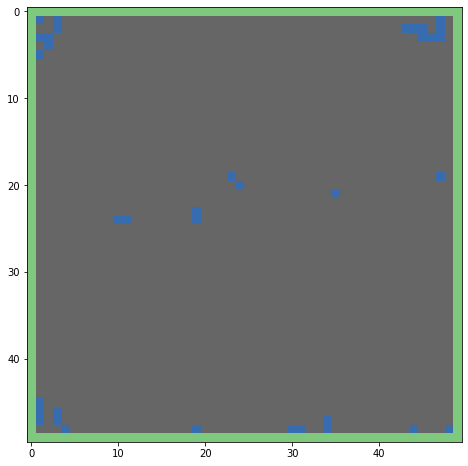

In [ ]:
for i in range(steps):

    plt.figure(figsize=(8, 8))
    plt.imshow(-w[0,0],cmap="Accent")
    plt.show()
    
    n = w == 1
    
    n = conv2(n,f)
    
    w =  2*((w == 2)).type(torch.int) - ((w == 2) * ( n > 0 ) ).type(torch.int)  + 4*((w == 4)).type(torch.int)       

In [ ]:
w[0][0][1:-1,1]

tensor([2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0],
       dtype=torch.int32)

In [ ]:
w[0][0][1,1:-1]

tensor([2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       dtype=torch.int32)

In [ ]:
w[0][0][1:-1,L-2]

tensor([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=torch.int32)

In [ ]:
w[0][0][L-2,1:-1]

tensor([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=torch.int32)

In [ ]:
stop = torch.sum((w[0][0][1:-1,1] == 1)) + torch.sum((w[0][0][1,1:-1] == 1)) + torch.sum((w[0][0][1:-1,L-2] == 1)) + torch.sum((w[0][0][L-2,1:-1] == 1)) 

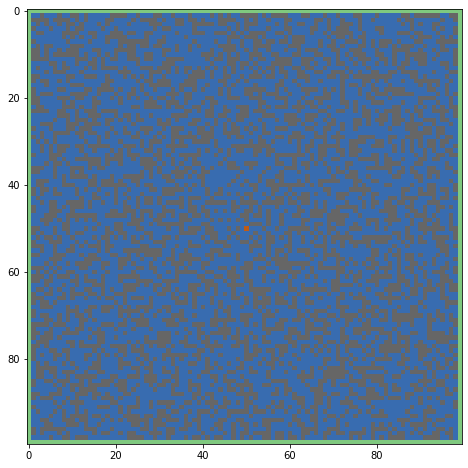

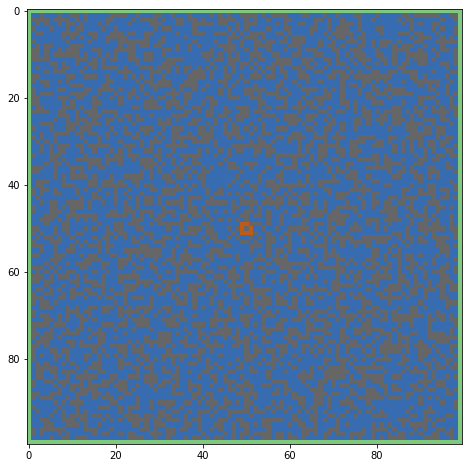

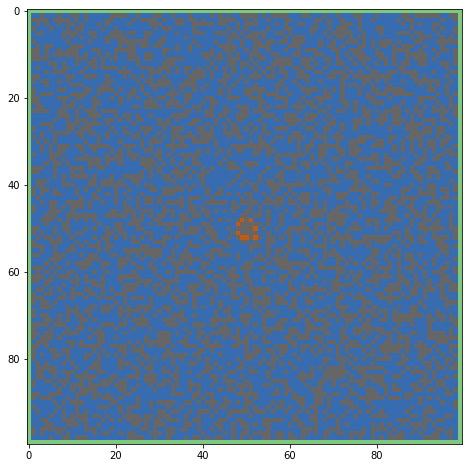

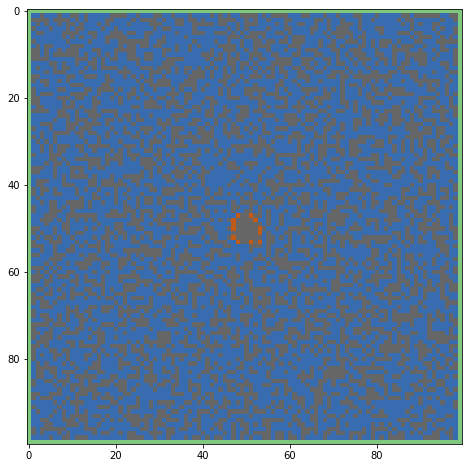

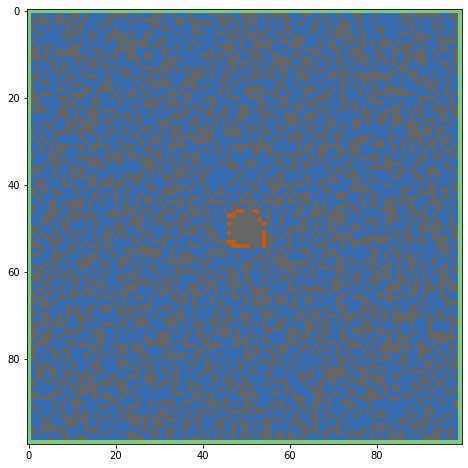

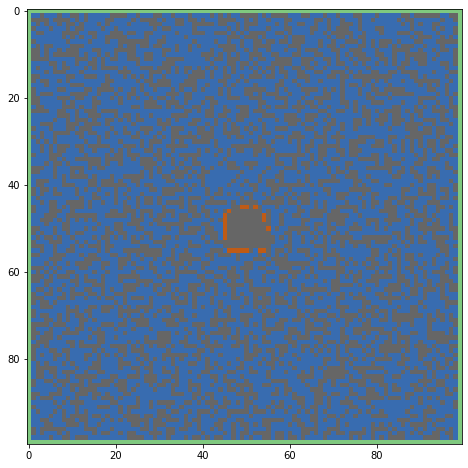

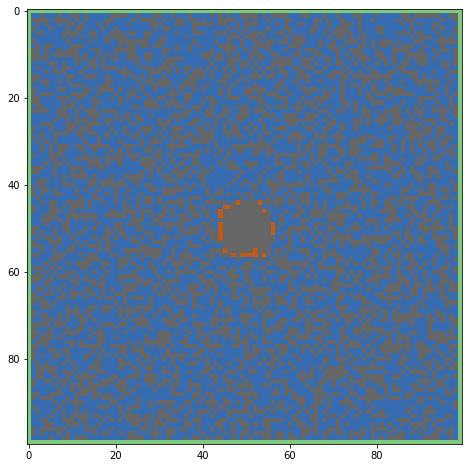

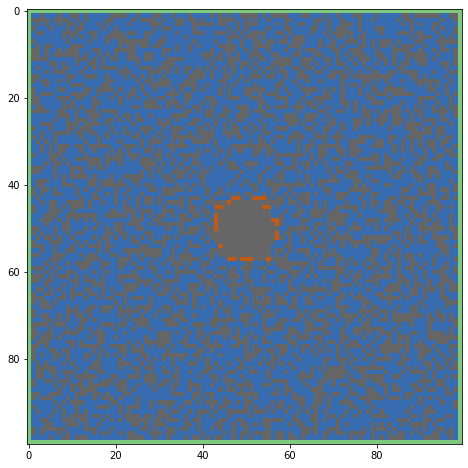

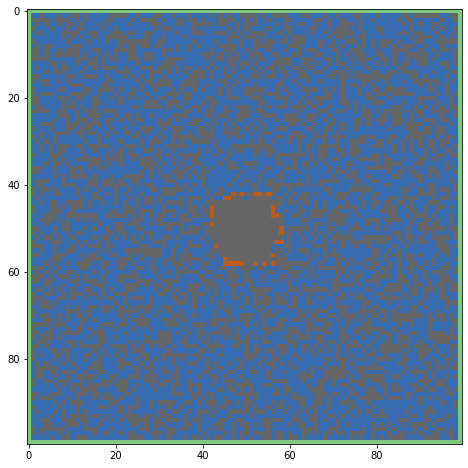

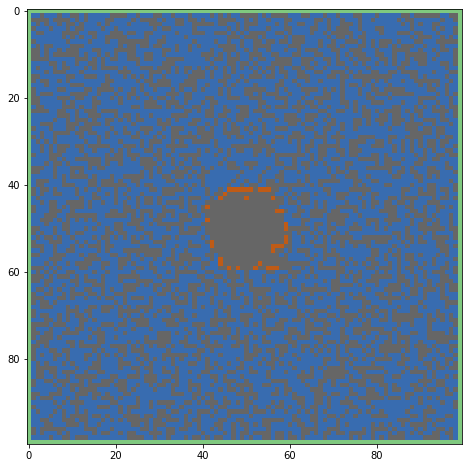

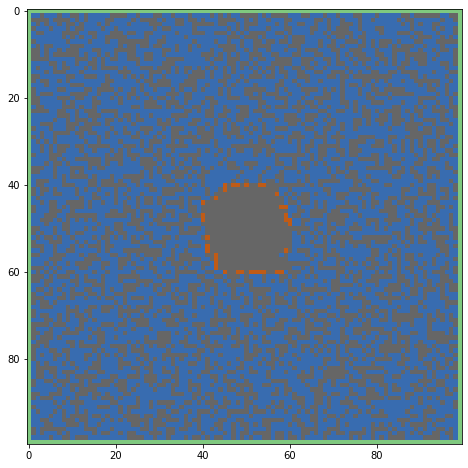

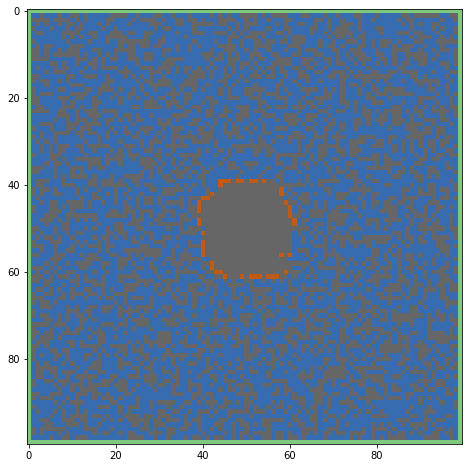

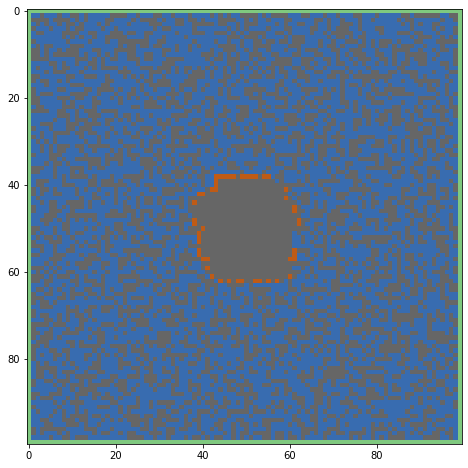

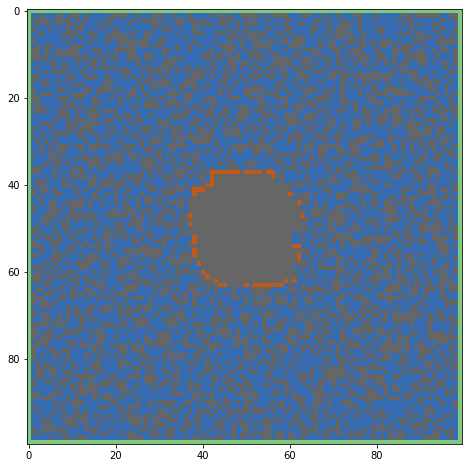

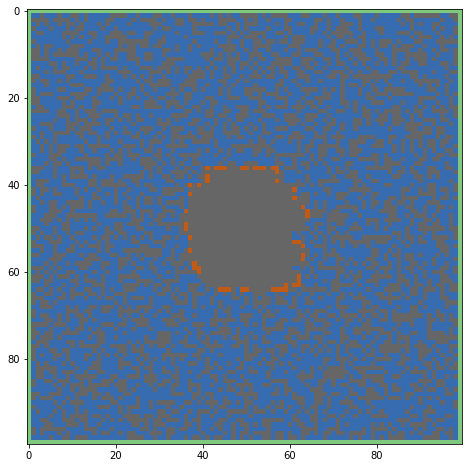

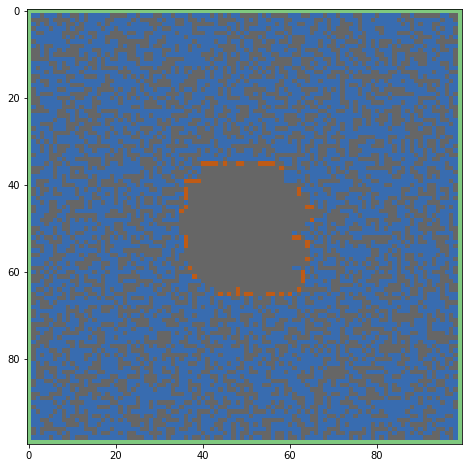

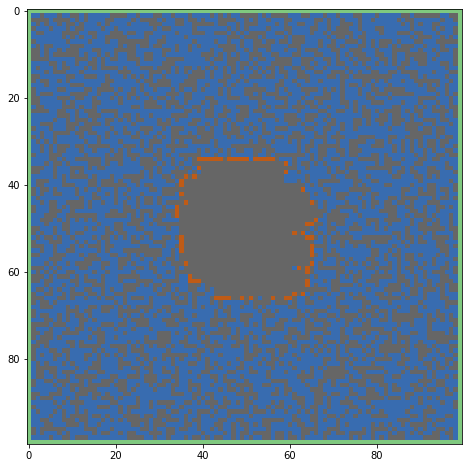

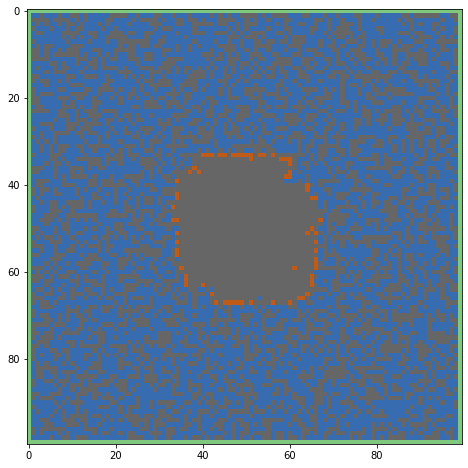

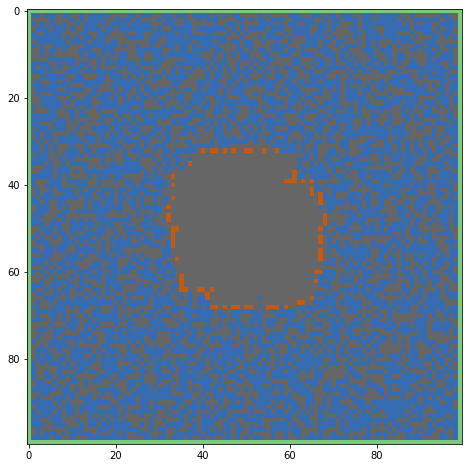

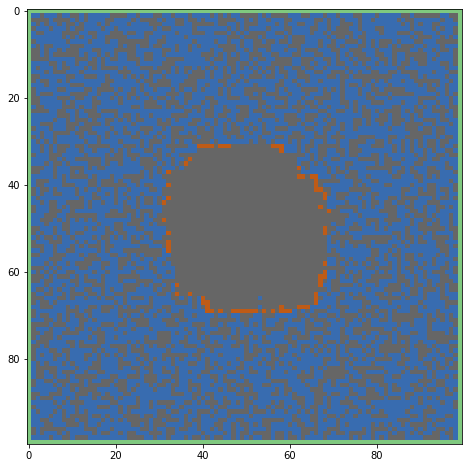

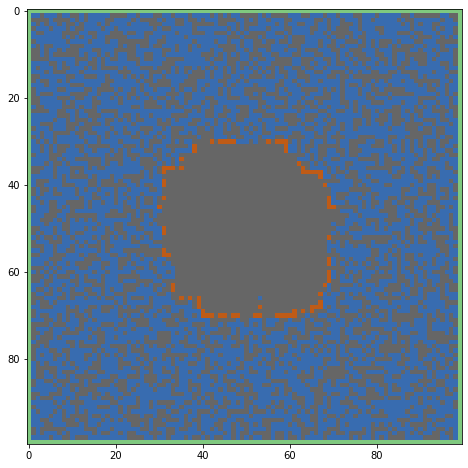

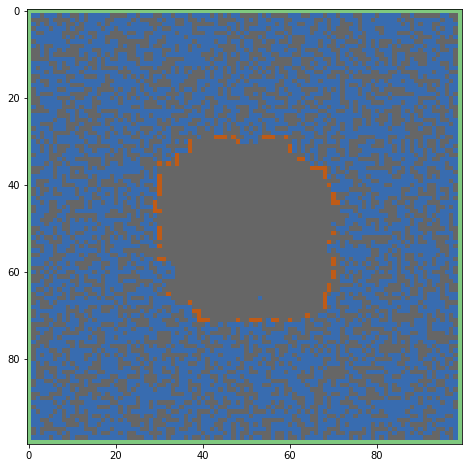

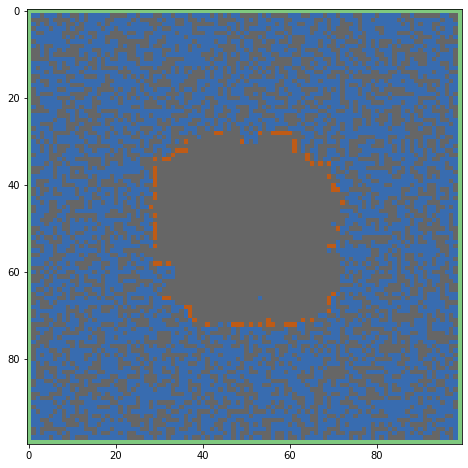

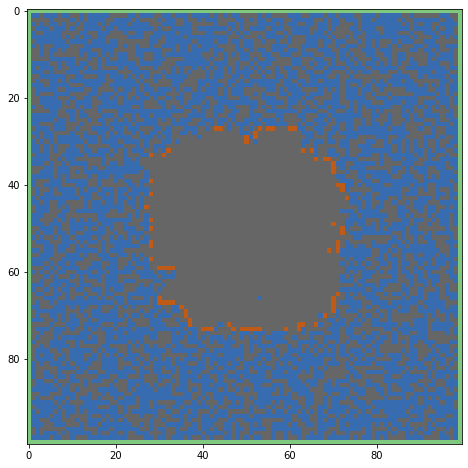

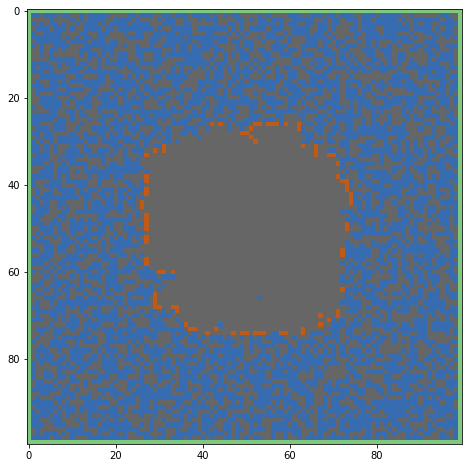

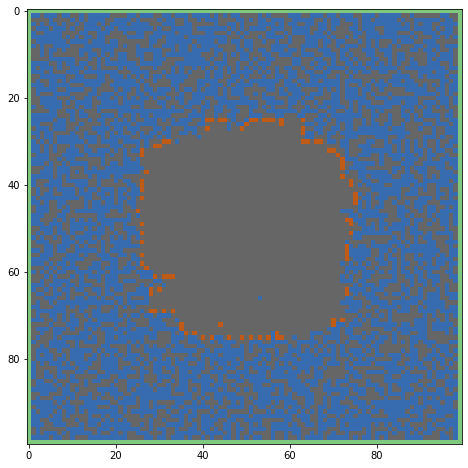

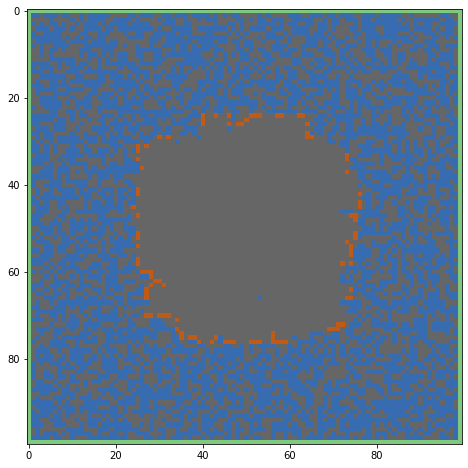

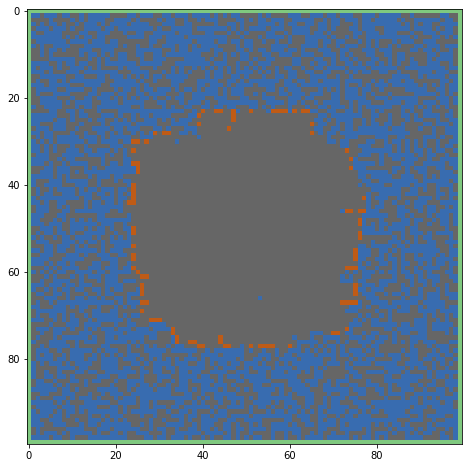

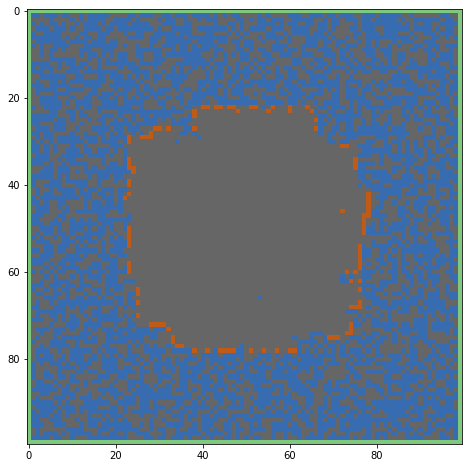

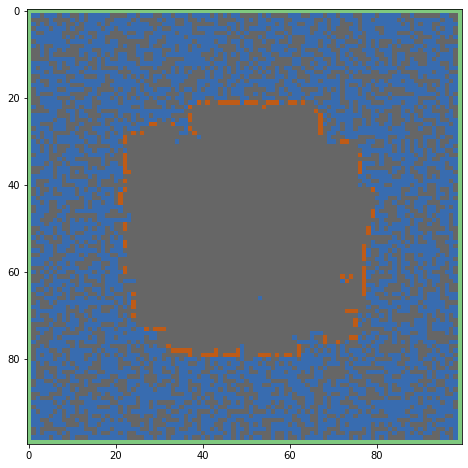

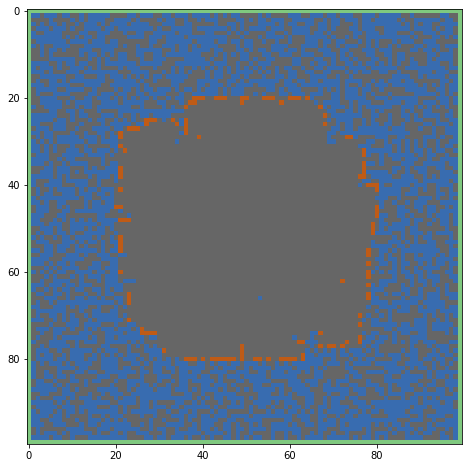

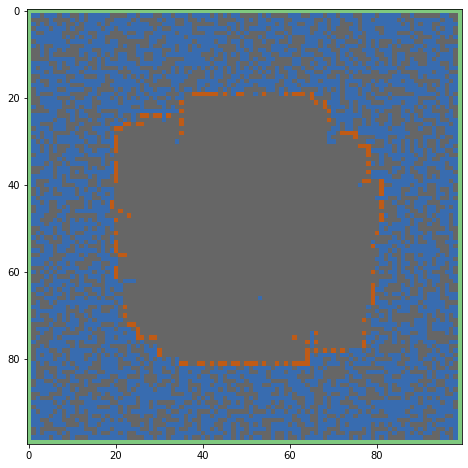

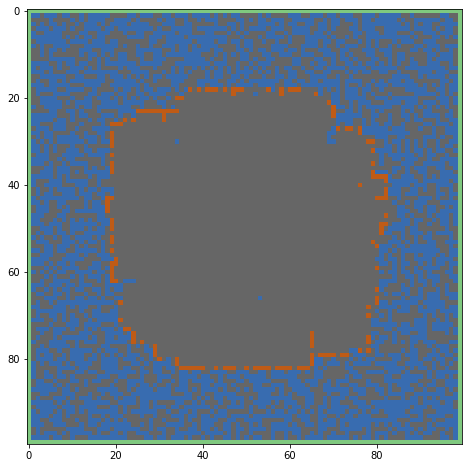

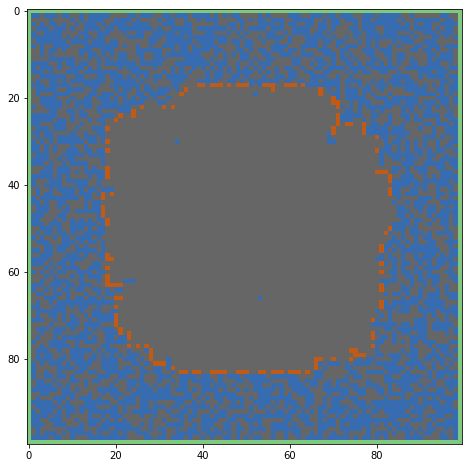

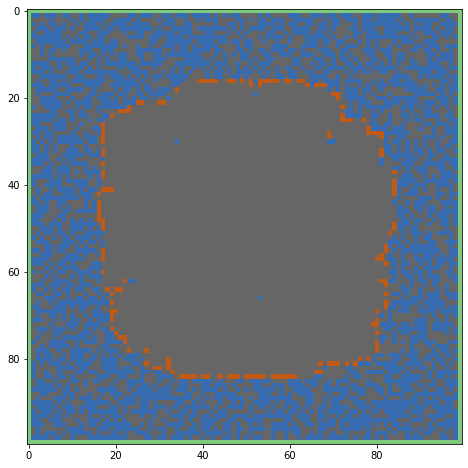

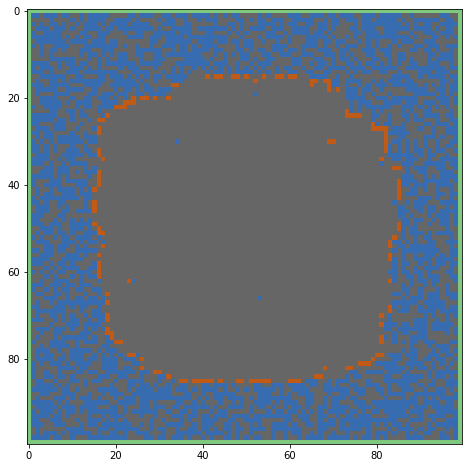

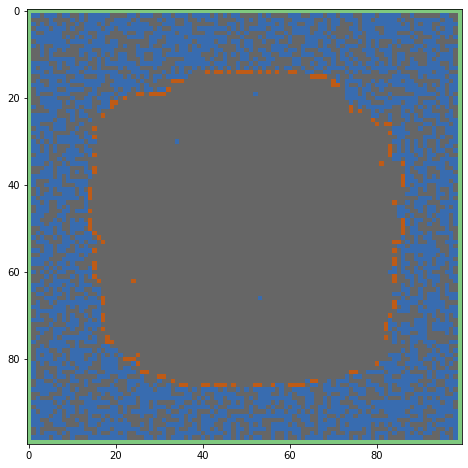

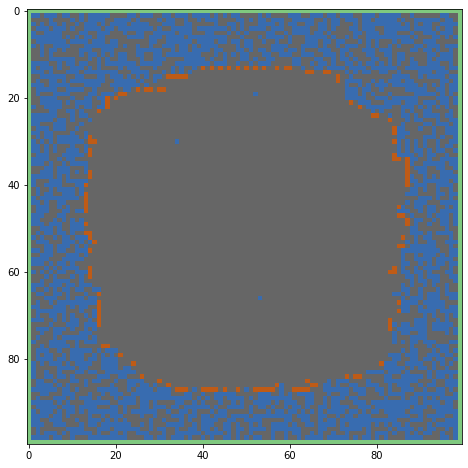

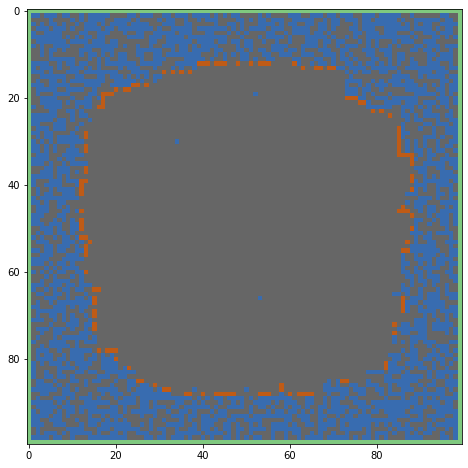

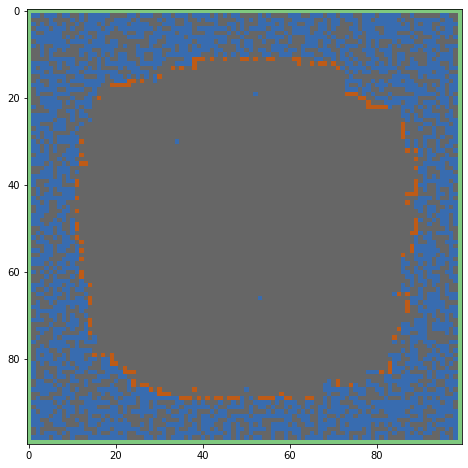

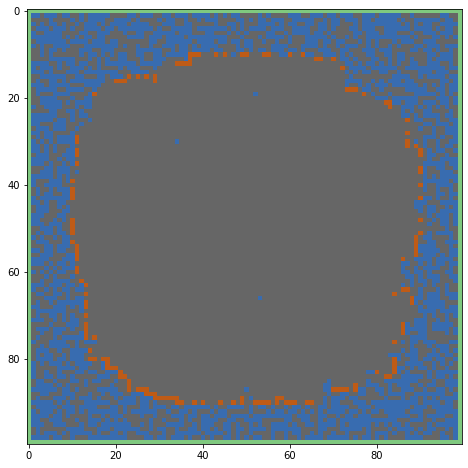

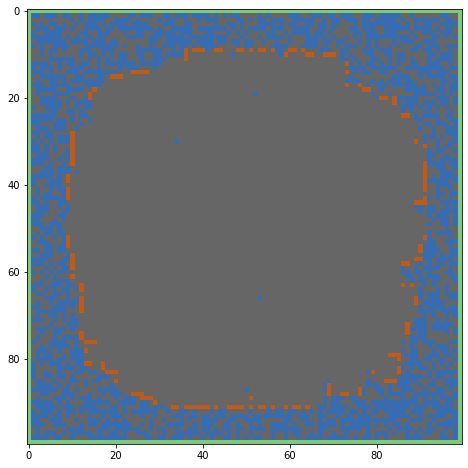

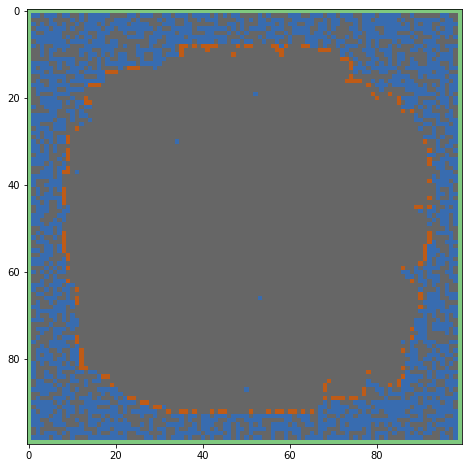

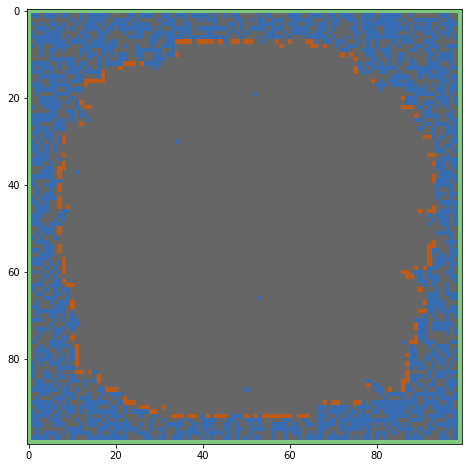

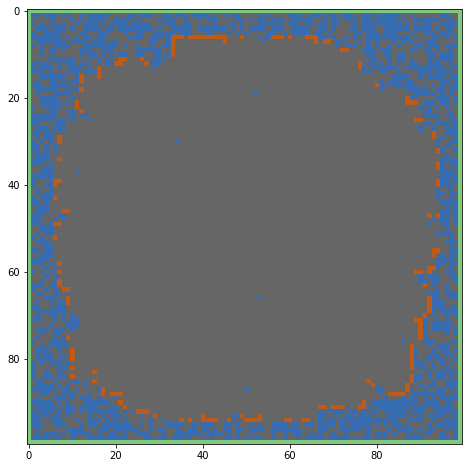

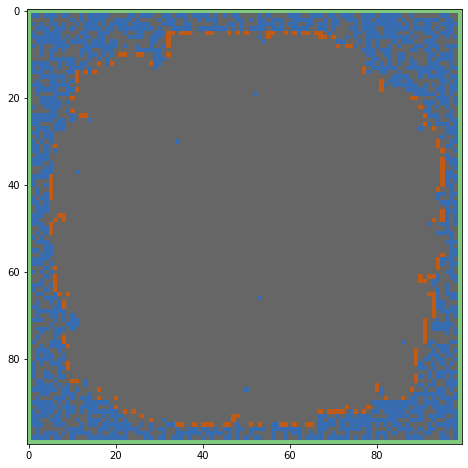

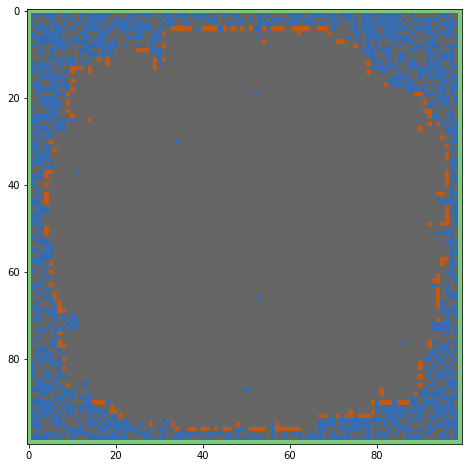

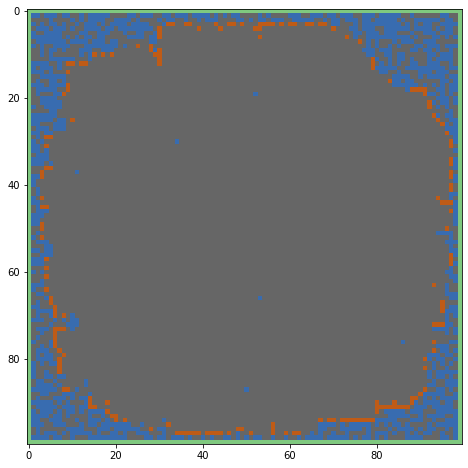

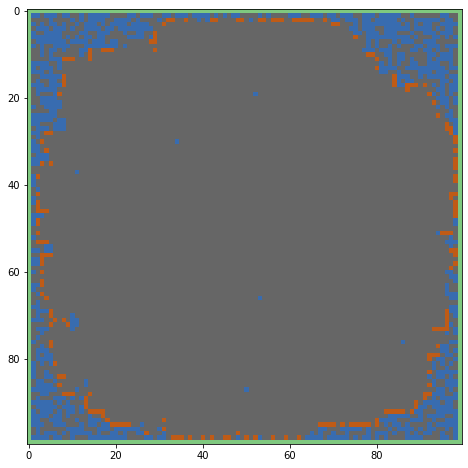

Percolation!


In [ ]:
L = 100
p = 0.57
z = np.random.random((L,L))
m = (z < p).astype(int)

m[L-1,:] = 2
m[:,L-1] = 2
m[0,:] = 2
m[:,0] = 2

w = (2*m).astype(int)
w[L//2,L//2] = 1
f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

steps = 100
A = torch.zeros((steps,L,L)) # storage for frames for animation
w = torch.tensor(w)[None,None,:,:]
f = torch.tensor(f)[None,None,:,:]

for i in range(steps):

    plt.figure(figsize=(8, 8))
    plt.imshow(-w[0,0],cmap="Accent")
    plt.show()

    if torch.sum((w[0][0][1:-1,1] == 1)) + torch.sum((w[0][0][1,1:-1] == 1)) + torch.sum((w[0][0][1:-1,L-2] == 1)) + torch.sum((w[0][0][L-2,1:-1] == 1)) : #Next to walls on fire
        print("Percolation!") 
        break 

    
    n = w == 1

    if torch.sum(n) == 0:
        print("No Percolation")
        break
 
    
    n = conv2(n,f)
    
    w =  2*((w == 2)).type(torch.int) - ((w == 2) * ( n > 0 ) ).type(torch.int)  + 4*((w == 4)).type(torch.int)



In [ ]:
N = 100

p = np.linspace(0,1,N)

Exp = np.zeros(N,)

for j in range(N):

    L = 50
    z = np.random.random((L,L))
    m = (z < p[j]).astype(int)

    m[L-1,:] = 2
    m[:,L-1] = 2
    m[0,:] = 2
    m[:,0] = 2

    w = (2*m).astype(int)
    w[L//2,L//2] = 1
    f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

    steps = 50
    A = torch.zeros((steps,L,L)) # storage for frames for animation
    w = torch.tensor(w)[None,None,:,:]
    f = torch.tensor(f)[None,None,:,:]

    for i in range(steps):

        # plt.figure(figsize=(8, 8))
        # plt.imshow(-w[0,0],cmap="Accent")
        # plt.show()

        if torch.sum((w[0][0][1:-1,1] == 1)) + torch.sum((w[0][0][1,1:-1] == 1)) + torch.sum((w[0][0][1:-1,L-2] == 1)) + torch.sum((w[0][0][L-2,1:-1] == 1)) : #Next to walls on fire
            print("Percolation!")
            Exp[j] = 1 
            break 

        
        n = w == 1

        if torch.sum(n) == 0:
            print("No Percolation")
            Exp[j] = 0 
            break
    
        
        n = conv2(n,f)
        
        w =  2*((w == 2)).type(torch.int) - ((w == 2) * ( n > 0 ) ).type(torch.int)  + 4*((w == 4)).type(torch.int)



No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
No Percolation
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Percolation!
Per

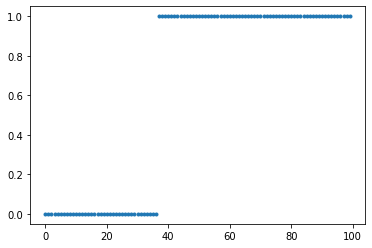

In [ ]:
plt.plot(Exp,'.')

In [ ]:
def experiment1(p):
    L = 50
    z = np.random.random((L,L))
    m = (z < p).astype(int)

    m[L-1,:] = 2
    m[:,L-1] = 2
    m[0,:] = 2
    m[:,0] = 2

    w = (2*m).astype(int)
    w[L//2,L//2] = 1
    f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

    steps = 25
    A = torch.zeros((steps,L,L)) # storage for frames for animation
    w = torch.tensor(w)[None,None,:,:]
    f = torch.tensor(f)[None,None,:,:]

    for i in range(steps):

        if torch.sum((w[0][0][1:-1,1] == 1)) + torch.sum((w[0][0][1,1:-1] == 1)) + torch.sum((w[0][0][1:-1,L-2] == 1)) + torch.sum((w[0][0][L-2,1:-1] == 1)) : #Next to walls on fire
            return 1 
             
        n = w == 1

        if torch.sum(n) == 0:
            return 0 
            

        n = conv2(n,f)
        
        w =  2*((w == 2)).type(torch.int) - ((w == 2) * ( n > 0 ) ).type(torch.int)  + 4*((w == 4)).type(torch.int)

    return 0 

In [ ]:
M = 500

N = 50

p = np.linspace(0,1,N)

Exp = np.zeros((M,N))

for i in range(M):
    print(i)

    for j in range(N):
        
        Exp[i,j] = experiment1(p[j])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

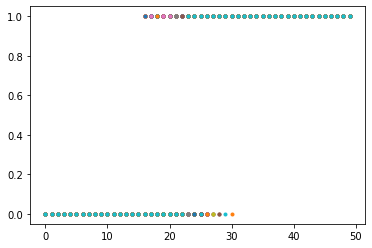

In [ ]:
plt.plot(Exp.T,'.');

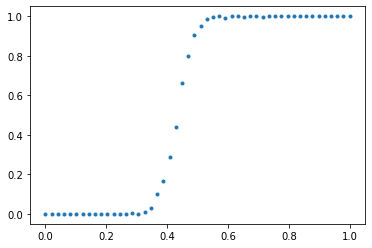

In [ ]:
plt.plot(p,np.sum(Exp,0)/M,'.')